In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [2]:
# Singular Value Decomposition (SVD)

# Eigendecomposition can be done only for square matrices
# SVD can do it for any shaped matrix

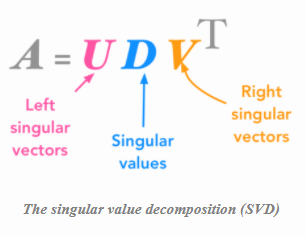

In [3]:
# U & V = orthogonal matrices
# # UT = U-1 and VT = V-1
# D = diagonal matrix but not necessarily square
# Columns of U = left-singular vectors of A
# Columns of V = right-singular vectors of A
# Values along the line of diagonal of A = D - the singular values of A

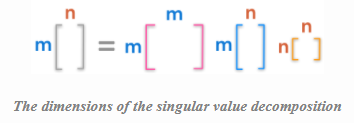

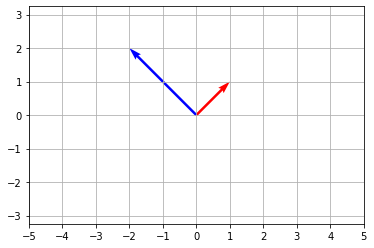

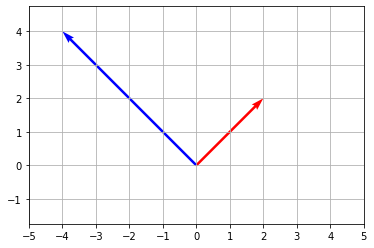

In [28]:
# Every matrix can be used as a linear transformation
# # i.e. applying matrix to vector or another matrix, it will apply some linear transformation to them

# for vector: v = [x, y]

# applying matrix:
# [2  0]
# [0  2]

# we have
# [x'] = [2  0] [x] = [2x + 0y] = [2x]
# [y']   [0  2] [y]   [0x + 2y]   [2y]

# we essentially doubled the coordinates of the vector
V = np.array([[1,1], [-2,2]])

M = np.array([
    [2, 0],
    [0, 2]
])

origin = np.array([[0, 0],[0, 0]]) # origin point


plt.quiver(*origin, V[:,0], V[:,1], color=['r','b'], units = 'xy', scale=1)
plt.axis('equal')
plt.xticks(range(-5,6))
plt.yticks(range(-5,6))
plt.grid()
plt.show()

Vprod1 = M.dot(V[:,0])
Vprod2 = M.dot(V[:,1])

V2 = np.array([
    [Vprod1[0], Vprod2[0]],
    [Vprod1[1], Vprod2[1]]
])


plt.quiver(*origin, V2[:,0], V2[:,1], color=['r','b'], units = 'xy', scale=1)
plt.axis('equal')
plt.xticks(range(-5,6))
plt.yticks(range(-5,9))
plt.grid()
plt.show()

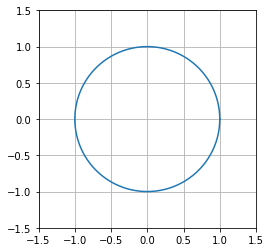

In [36]:
# A set of unit vectors = vectors of norm 1
# as such, we get a unit circle - The unit circle represents the coordinates of every unit vectors
t = np.linspace(0, 2*np.pi, 100)
x = np.cos(t)
y = np.sin(t)

plt.figure()
plt.plot(x, y)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

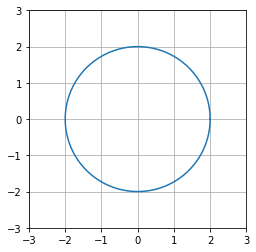

In [39]:
# here, we'll apply some transformations to the unit circle

def mat_transform(x, y, mat):
    newX = np.zeros(len(x))
    newY = np.zeros(len(x))
    for i in range(len(x)):
        unitVector_i = np.array([x[i], y[i]])
        nxy = mat.dot(unitVector_i)
        newX[i] = nxy[0]
        newY[i] = nxy[1]
    return newX, newY

# use the same matrix
M = np.array([
    [2, 0],
    [0, 2]
])

nx, ny = mat_transform(x, y, M)

plt.figure()
plt.plot(nx, ny)
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

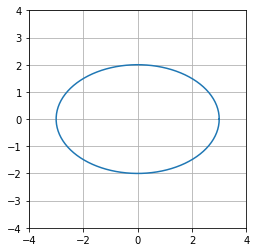

In [41]:
# applying a different matrix...

M2 = np.array([
    [3, 0],
    [0, 2]
])

nx, ny = mat_transform(x, y, M2)
plt.figure()
plt.plot(nx, ny)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

In [ ]:
# coordinates associated with new cirle are:

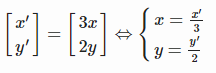

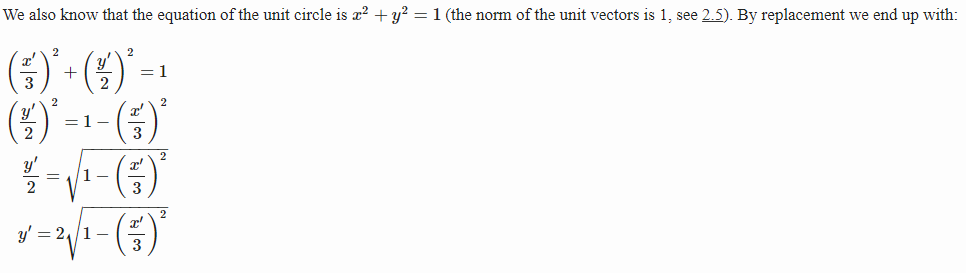

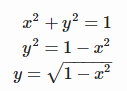

In [42]:
# this corresponds to the original circle:

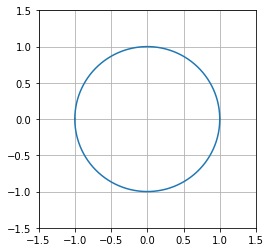

In [47]:
x = np.linspace(-1, 1, 100000)
y = np.sqrt(1-(x**2))
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.gca().set_aspect("equal")
plt.show()

In [48]:
# And here is the definition of the transformed circle:

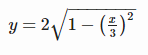

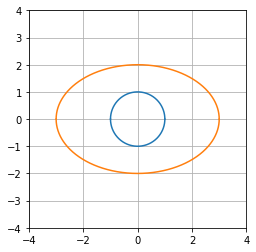

In [53]:
# y is defined from a square root = which means the result can be negative or positive i.e. 4 can come from 2^2 or (-2)^2.
# need to plot both positive and negative
plt.plot(x, y, sns.color_palette().as_hex()[0])
plt.plot(x, -y, sns.color_palette().as_hex()[0])

# now lets calculate the transformed circle
x1 = np.linspace(-3, 3, 100000)
y1 = 2 * np.sqrt(1 - ((x1 / 3)**2))

plt.plot(x1, y1, sns.color_palette().as_hex()[1])
plt.plot(x1, -y1, sns.color_palette().as_hex()[1])

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.gca().set_aspect("equal")
plt.show()

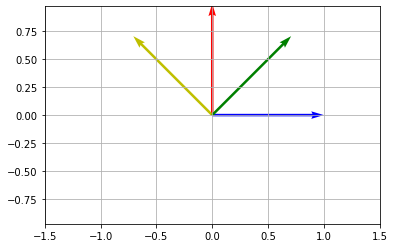

In [67]:
# The general rule is that the transformation associated with diagonal matrices imply only a rescaling of each coordinate without rotation
# we have only used the diagonal matrix D from the SVD

# Rotation matrices:
# non-diagonal matrices

angle = 45

# transformation matrix
R = np.array([
    [np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
    [np.sin(np.radians(angle)), np.cos(np.radians(angle))]
])

# vectors
u = np.array([0, 1])
v = np.array([1, 0])

# transform vectors
uR_ = R.dot(u)
vR_ = R.dot(v)

# plot original
plt.quiver([0], [0], u[0], u[1], color=['r'], units = 'xy', scale=1)
plt.quiver([0], [0], v[0], v[1], color=['b'], units = 'xy', scale=1)

# plot transformed
plt.quiver([0], [0], uR_[0], uR_[1], color=['y'], units = 'xy', scale=1)
plt.quiver([0], [0], vR_[0], vR_[1], color=['g'], units = 'xy', scale=1)

plt.axis('equal')
# plt.xticks(range(-5,6))
# plt.yticks(range(-5,9))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.grid()
plt.show()


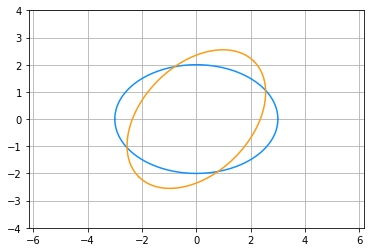

In [73]:
# Transforming circles:

# scaled circle
x = np.linspace(-3, 3, 100000)
y = 2 * np.sqrt(1 - ((x/3)**2))

# rotate coordinates (positive due to sqrt)
x1 = x*np.cos(np.radians(45)) - y*np.sin(np.radians(45))
y1 = x*np.sin(np.radians(45)) + y*np.cos(np.radians(45))

# rotate coordinates (negative due to sqrt)
x1_neg = x*np.cos(np.radians(45)) - -y*np.sin(np.radians(45))
y1_neg = x*np.sin(np.radians(45)) + -y*np.cos(np.radians(45))

# plot original circle
plt.plot(x, y, '#1190FF')
plt.plot(x, -y, '#1190FF')

# plot rotated circle
plt.plot(x1, y1, '#FF9A13')
plt.plot(x1_neg, y1_neg, '#FF9A13')

plt.axis('equal')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.grid()
plt.show()

In [77]:
# Visualising SVD:

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                   alpha=alpha)

def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors
    Returns:
    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y
    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]
    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])
    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)
    

    

Unit circle:


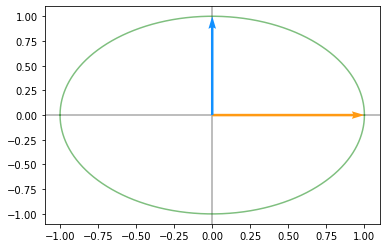

In [78]:
# need to visualise the 3 transformations done by each svd component & the transformation done by svd vs. the original matrix
# matrix:

A = np.array([
    [3, 7],
    [5, 2]
])

print('Unit circle:')

matrixToPlot(np.array([[1, 0], [0, 1]]))


Unit circle transformed by A:


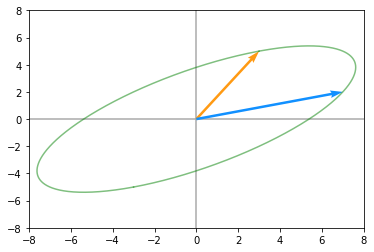

In [80]:
print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

In [81]:
# lets compute svd of matrix A
U, D, V = np.linalg.svd(A)

Unit circle:


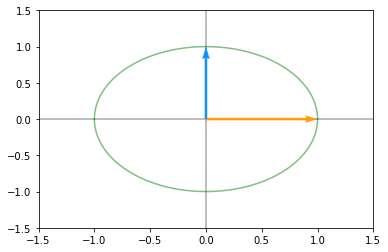

First rotation:


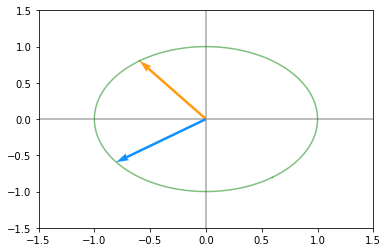

Scaling:


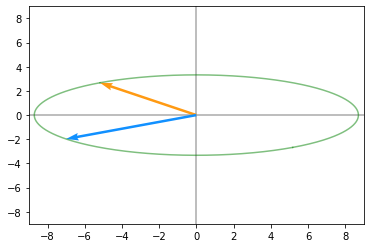

Second rotation:


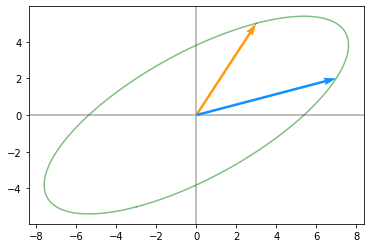

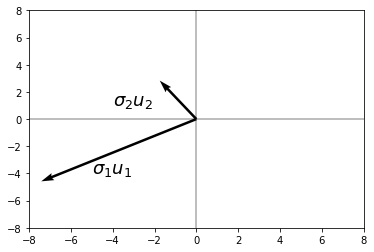

In [90]:
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Second rotation:')
u1 = [D[0]*U[0,0], D[0]*U[0,1]]
v1 = [D[1]*U[1,0], D[1]*U[1,1]]

matrixToPlot(U.dot(np.diag(D)).dot(V))
plotVectors([u1, v1], cols=['black', 'black'])

plt.text(-5, -4, r"$\sigma_1u_1$", size=18)
plt.text(-4, 1, r"$\sigma_2u_2$", size=18)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

The singular values are ordered by descending order. They correspond to a new set of features (that are a linear combination of the original features) with the first feature explaining most of the variance. For instance from the last example we can visualize these new features. The major axis of the elipse will be the first left singular vector (u1) and its norm will be the first singular value (σ1).

They are the major (σ1u1) and minor (σ2u2) axes of the elipse. We can see that the feature corresponding to this major axis is associated with more variance (the range of value on this axis is bigger than the other). See 2.12 for more details about the variance explained.

### Finding SVD's decomposition transformations

In [109]:
# U, D, V can be found by transforming A into a square matrix and then computing eigenvectors/values of this square matrix
# square matrix obtained by multiplying A by its transpose

# Matrix A:

A_orig = np.array([
    [7, 2],
    [3, 4],
    [5, 3]
])

A = A_orig.dot(A_orig.T)

# A
# # U = eigenvectors of AAT
# # V = eigenvectors of ATA
# # D = eigenvalues of ATA or AAT

# # can also be found using numpy (as up) = np.linalg.svd() --> U, D, V

AAT = A.dot(A.T)
ATA = A.T.dot(A)

U = np.linalg.eig(AAT)[1]
V = np.linalg.eig(ATA)[1]

D1 = np.linalg.eig(ATA)[0]
D2 = np.linalg.eig(AAT)[0]


# D = np.linalg.eig(AAT)[0]

pprint(U)
pprint(V)
pprint(np.sqrt(D1))
pprint(np.sqrt(D2))
print("-----------------")
pprint(np.linalg.svd(A_orig))

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])
array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])
array([105.09175083,   6.90824917,          nan])
array([105.09175083,   6.90824917,          nan])
-----------------
(array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]]),
 array([10.25142677,  2.62835484]),
 array([[-0.88033817, -0.47434662],
       [ 0.47434662, -0.88033817]]))


<ipython-input-109-733e7172cfb0>:35: RuntimeWarning: invalid value encountered in sqrt
  pprint(np.sqrt(D1))
<ipython-input-109-733e7172cfb0>:36: RuntimeWarning: invalid value encountered in sqrt
  pprint(np.sqrt(D2))
